In [1]:
# import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import exp
from numpy.random import uniform

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
# data pre-processing
df = df.drop([df.columns[0]], axis=1)
df = df.drop([df.columns[1], df.columns[3]], axis=1)
df = df[df["Species"] != "setosa"]
df.ix[df.Species == "versicolor", "Species"] = 1 # versicolor = 1
df.ix[df.Species == "virginica", "Species"] = 0 # virginica = 0
df = df.reset_index(drop=True)
df

C:\Users\chong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


,Sepal.Length,Petal.Length,Species
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1
5,5.7,4.5,1
6,6.3,4.7,1
7,4.9,3.3,1
8,6.6,4.6,1
9,5.2,3.9,1


In [7]:
def add_layer(inputs, in_size, out_size, layer_name, activation_function=None):
    l_name = layer_name
    with tf.name_scope(l_name):
        with tf.name_scope(l_name + '_weights'):
            Weights = tf.Variable(tf.random_uniform([in_size, out_size], 1e-3, 1e-2, name='weights'))
            tf.summary.scalar(l_name + '_weights', Weights)
            tf.summary.histogram(l_name + '_weights', Weights)
        with tf.name_scope(l_name + '_biases'):
            biases = tf.Variable(tf.random_uniform([out_size], name='biases'))
            tf.summary.histogram(l_name + '_biases', biases)
        with tf.name_scope(l_name + '_weighted_linear_combination'):
            lr_comb = tf.matmul(inputs, Weights) + biases
        if activation_function is None:
            outputs = lr_comb
        else:
            outputs = activation_function(lr_comb)
            tf.summary.histogram(l_name + '_prediction', outputs)
        return(outputs)

In [9]:
x_data = np.array(df[df.columns[:-1]])
y_data = np.array(df[df.columns[-1]]).reshape(x_data.shape[0], 1)

# declare inputs
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32, [None, 2], name='x-inputs')
    ys = tf.placeholder(tf.float32, [None, 1], name='y-inputs')

# single-neuron activity in single-layer
with tf.name_scope('neuron_outputs'):
    prediction = add_layer(xs, 2, 1, 'neuron', activation_function=tf.nn.sigmoid)

# compute cost using cross-entropy
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=ys, logits=prediction))
    tf.summary.scalar('cost', cost)
# initialize gradient descent optimizer
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

# compute accuracy
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.round(prediction), ys), tf.float32))
    tf.summary.scalar('accuracy', accuracy)

sess = tf.InteractiveSession()
writer = tf.summary.FileWriter('./snc_tf', sess.graph)
merged = tf.summary.merge_all()

# launch variable initializer
sess.run(tf.global_variables_initializer())

for i in range(2001):
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 100 == 0:
        print(sess.run(accuracy, feed_dict={xs: x_data, ys: y_data}))

#       results = sess.run(merged, feed_dict={xs: x_data, ys: y_data})
#        writer.add_summary(results, i)

0.53
0.5
0.5
0.5
0.5
0.51
0.54
0.62
0.68
0.73
0.77
0.8
0.82
0.84
0.84
0.85
0.85
0.86
0.85
0.86
0.88


In [21]:
help(tf.Session().run)

Help on method run in module tensorflow.python.client.session:

run(fetches, feed_dict=None, options=None, run_metadata=None) method of tensorflow.python.client.session.Session instance
    Runs operations and evaluates tensors in `fetches`.
    
    This method runs one "step" of TensorFlow computation, by
    running the necessary graph fragment to execute every `Operation`
    and evaluate every `Tensor` in `fetches`, substituting the values in
    `feed_dict` for the corresponding input values.
    
    The `fetches` argument may be a single graph element, or an arbitrarily
    nested list, tuple, namedtuple, dict, or OrderedDict containing graph
    elements at its leaves.  A graph element can be one of the following types:
    
    * An @{tf.Operation}.
      The corresponding fetched value will be `None`.
    * A @{tf.Tensor}.
      The corresponding fetched value will be a numpy ndarray containing the
      value of that tensor.
    * A @{tf.SparseTensor}.
      The correspondi

In [43]:
# single neuron classifier using tensorflow

def Sneuron_classifier(dataframe, eta, epochs):
    
    # construct input and target array from dataframe
    input_data = np.array(dataframe[dataframe.columns[:-1]])
    target_data = np.array(dataframe[dataframe.columns[-1]]).reshape(input_data.shape[0], 1)
    
    # system-wise variables
    N_rows = input_data.shape[0]
    N_weights = input_data.shape[1]
    N_neurons = 1
    
    with tf.name_scope('input'):
        x = tf.placeholder(tf.float32, name="x-input") # declare input data
        y_ = tf.placeholder(tf.float32, name="y-input") # declare target array
    
    # construct tensorflow ML pipeline
    with tf.name_scope("weights"):
        W = tf.Variable(tf.zeros([N_weights, N_neurons])) # initiate weight matrix
    
    with tf.name_scope("bias"):
        b = tf.Variable(tf.zeros([N_neurons])) # initiate bias matrix
    
    # compute neuron output
    with tf.name_scope("sigmoid"):
        y = tf.sigmoid(tf.matmul(x, W) + b)
    
    # compute cross-entropy of y
    with tf.name_scope("cross-entropy"):
        cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_, logits=y))
    
    # define training step
    with tf.name_scope("train"):
        train_step = tf.train.GradientDescentOptimizer(eta).minimize(cross_entropy)
    
    # compute accuracy
    with tf.name_scope("accuracy"):
        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.round(y), y_), tf.float32))
    
    # create a summary for cost and accuracy
    tf.summary.scalar("cost", cross_entropy)
    tf.summary.scalar("accuracy", accuracy)
    tf.summary.histogram("biases", b)
    
    # initiate batch training
    sess = tf.InteractiveSession()
        
    # variables need to be initialized before we can use them
    sess.run(tf.global_variables_initializer())
            
    # merge all summaries into a single "operation" which we can execute in a session 
    summary_op = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./snc_tensorflow", sess.graph)
    
    # launch training
    for i in range(epochs):
        sess.run(train_step, feed_dict={x: input_data, y_: target_data})
        if i % 100 == 0:
            #writer.add_summary(sess.run(summary_op), i)
            training_accuracy = sess.run(accuracy, feed_dict={x: input_data, y_: target_data})
            print(training_accuracy)

w = Sneuron_classifier(df, 0.5, 1000)

0.5
0.51
0.76
0.84
0.88
0.9
0.9
0.9
0.9
0.9


In [61]:
# create collections to store historical weights & errors
weight1 = []
weight2 = []
bias = []
accuracy = []

def single_neuron_classifier(learning_rate, conf, generations):
    # claim training dataset & parameters
    x1 = np.array(df[df.columns[0]]) # sepal length
    x2 = np.array(df[df.columns[1]]) # petal length
    t = np.array(df[df.columns[2]]) # target
    eta = learning_rate
    inconf = 1 - conf
    
    # initialize random weigts: w1 & w2; initialize random bias
    weights = np.zeros([2, 1])
    w1 = weights[0]
    w2 = weights[1]
    b = uniform(size=1)[0]
    
    weight1.append(w1) # insert initial weight1
    weight2.append(w2) # insert initial weight2
    bias.append(b) # insert initial bias
    
    # learning process
    for i in range(generations):
        # neuron activation
        a = w1 * x1 + w2 * x2
        # neuron activity/output
        y = 1 / (1 + exp(-a-b))
        # calculate error
        err = t - y
        # calculate accuracy based on a specified confidence
        acc = len(np.where((np.absolute(err) < inconf) == True)[0]) / len(t)
        accuracy.append(acc)
        # update weights & bias
        w1 = w1 - eta * ((-err * x1).sum()) # gradient_x1 = -err * x1
        weight1.append(w1)
        w2 = w2 - eta * ((-err * x2).sum()) # gradient_x2 = -err * x2
        weight2.append(w2)
        b = b - eta * (-err.sum()) # gradient_b = -err
        bias.append(b)

single_neuron_classifier(0.1, 0.95, 1000)

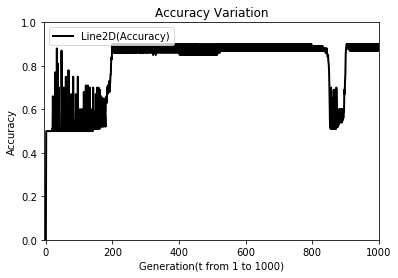

In [62]:
# function to plot the variation of accuracy overtime

def accuracy_variation():
    accur, = plt.plot(accuracy, label="Accuracy", color="black", linestyle="-", linewidth=2)
    
    plt.legend([accur], loc=2)
    plt.xlim([-5, 1000])
    plt.ylim([0, 1])
    plt.title("Accuracy Variation")
    plt.xlabel("Generation(t from 1 to 1000)")
    plt.ylabel("Accuracy")
    plt.show()

accuracy_variation()

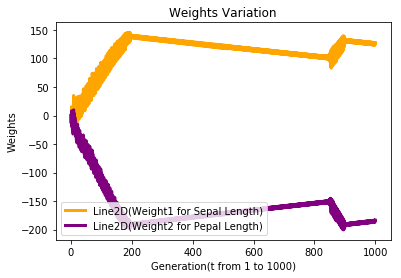

In [63]:
# function to plot weights variation

def weights_variation():
    w1, = plt.plot(weight1, label="Weight1 for Sepal Length", color="orange", linestyle="-", linewidth=3)
    w2, = plt.plot(weight2, label="Weight2 for Pepal Length", color="purple", linestyle="-", linewidth=3)
    
    plt.legend([w1, w2], loc=3)
    plt.title("Weights Variation")
    plt.xlabel("Generation(t from 1 to 1000)")
    plt.ylabel("Weights")
    plt.show()

weights_variation()

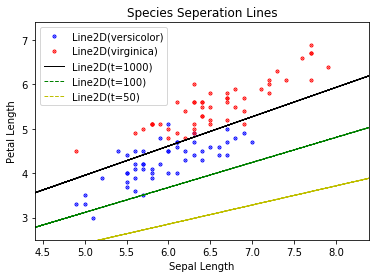

In [7]:
# function to plot scatter plot & lines to seperate species

def classification_line():
    versicolor, = plt.plot(df[df["Species"] == 1]['Sepal.Length'], df[df["Species"] == 1]['Petal.Length'],
                           "bo",
                           label="versicolor",
                           markeredgewidth=3,
                           markersize=1)
    virginica, = plt.plot(df[df["Species"] == 0]['Sepal.Length'], df[df["Species"] == 0]['Petal.Length'],
                          "ro",
                          label="virginica",
                          markeredgewidth=3,
                          markersize=1)

    # classification line iteration=1000
    k = - weight1[-1] / weight2[-1]
    b = - bias[-1] / weight2[-1]
    x = np.random.randint(0, 15, 10)
    y = k * x + b
    line1000, = plt.plot(x, y, label="t=1000", color='k', linestyle='-', linewidth=1)
    # classification line iteration=100
    k100 = - weight1[100] / weight2[100]
    b100 = - bias[100] / weight2[100]
    y100 = k100 * x + b100
    line100, = plt.plot(x, y100, label="t=100", color='g', linestyle='--', linewidth=1)
    # classification line iteration=50
    k50 = - weight1[50] / weight2[50]
    b50 = - bias[50] / weight2[50]
    y50 = k50 * x + b50
    line50, = plt.plot(x, y50, label="t=50", color='y', linestyle='--', linewidth=1)
    
    # plot legend
    plt.legend([versicolor, virginica, line1000, line100, line50], loc=2)
    
    plt.xlim([df[df.columns[0]].min() - 0.5, df[df.columns[0]].max() + 0.5])
    plt.ylim([df[df.columns[1]].min() - 0.5, df[df.columns[1]].max() + 0.5])
    plt.title("Species Seperation Lines")
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.show()

classification_line()